In [1]:
from pathlib import Path
import numpy as np

input_file = Path('../../AdventOfCode_inputs/AoC-2025-09-input.txt')

rinput = input_file.read_text()

In [2]:
sinput = '''7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
'''

In [3]:
ainput = rinput

In [4]:
reds = [list(map(int,s.split(","))) for s in ainput.splitlines()]
reds.append(reds[0])
len(reds)

497

**Part One**

In [5]:
area = dict()
for i in range(len(reds)) :
    for j in range(i+1,len(reds)) :
        area[(i,j)] = (abs(reds[i][1]-reds[j][1])+1)*(abs(reds[i][0]-reds[j][0])+1)
ans1 = max([a for a in area.values()])

In [6]:
ans1

4738108384

**Part Two**

In [7]:
def irect(a,b):
    a1 = [min(a[0],b[0]), min(a[1],b[1])]
    b1 = [max(a[0],b[0]), max(a[1],b[1])]
    return [a1,[a1[0],b1[1]], b1, [b1[0],a1[1]],a1]

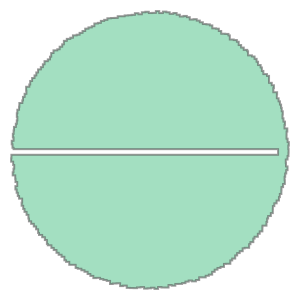

In [8]:
import shapely
from shapely import Point
P = shapely.Polygon(reds)
#P1 = shapely.union_all([shapely.Polygon(irect(reds[i],reds[i+1])) for i in range(len(reds)-1)])
#P = P1.union(P0).normalize()
P

In [9]:
amax = 0
idxa = (0,1)
for i in range(len(reds)) :
    for j in range(i+1,len(reds)) :
        S = shapely.Polygon(irect(reds[i],reds[j]))
        if area[i,j] > amax:
            if P.covers(S) :
                amax = area[i,j]
                idxa = (i,j)
ans2 = amax
amax,idxa

(1513792010, (218, 248))

In [10]:
ans2

1513792010

In [11]:
S = shapely.Polygon(irect(reds[idxa[0]],reds[idxa[1]]))
S.area

1513685922.0

In [12]:
area[idxa]

1513792010

1513758030 is somehow wrong